# Envelopes Strategy

### Example of 100 candles of 15 min

In [3]:
#!pip install oandapyV20

  Running setup.py bdist_wheel for oandapyV20: started
  Running setup.py bdist_wheel for oandapyV20: finished with status 'done'
  Stored in directory: C:\Users\HP\AppData\Local\pip\Cache\wheels\2c\b0\cd\49054320a6cc51db0ff4f1ee15d8840375f16cef57b81ebfc0
Successfully built oandapyV20


In [ ]:
#!pip install zulu

In [64]:
#!pip install mpl_finance

In [41]:
import pandas as pd
import oandapyV20
import oandapyV20.endpoints.instruments as instruments
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import datetime
import zulu

In [2]:
ID = '1XX-XXX-XXXXXXX-XX1'
token = '49XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX4'

In [3]:
client = oandapyV20.API(access_token=token)

In [4]:
params = {
          "count": 100,
          "granularity": "M15"}

In [5]:
r = instruments.InstrumentsCandles(instrument="EUR_USD",
                                   params=params)

In [6]:
rv = client.request(r)

In [7]:
dat = []
for oo in r.response['candles']:
    dat.append([oo['time'], oo['mid']['o'], oo['mid']['h'], oo['mid']['l'], oo['mid']['c']])

In [8]:
df = pd.DataFrame(dat)
df.columns = ['Time', 'Open', 'High', 'Low', 'Close']
df["Time"] = pd.to_datetime(df['Time'])
df['Time'] = df['Time'].apply(mpl_dates.date2num)
df = df.astype(float)
#df = df.set_index('Time')
df.head()

,Time,Open,High,Low,Close
0,737509.041667,1.07871,1.07994,1.07844,1.07959
1,737509.052083,1.07957,1.08010,1.07857,1.07974
2,737509.062500,1.07976,1.07995,1.07926,1.07990
3,737509.072917,1.07988,1.08089,1.07980,1.08070
4,737509.083333,1.08071,1.08079,1.08014,1.08030


In [9]:
plt.style.use('ggplot')

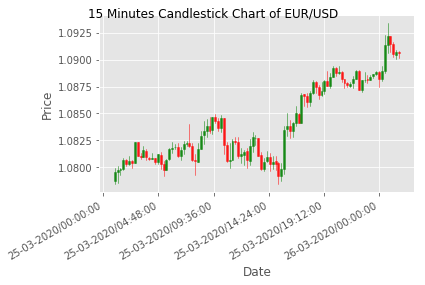

In [10]:
# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, df.values, width=0.007, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('15 Minutes Candlestick Chart of EUR/USD')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y/%H:%M:%S')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

## Envelope strategy on EURUSD

In [319]:
# To do only to start the dataset
params = {
        "from": "2010-04-01T00:00:00Z",
        "granularity": "M15"}

r = instruments.InstrumentsCandles(instrument="EUR_USD",
                                   params=params)

rv = client.request(r)

dat = []
for oo in r.response['candles']:
    dat.append([oo['time'], oo['mid']['o'], oo['mid']['h'], oo['mid']['l'], oo['mid']['c']])
    
eurusd = pd.DataFrame(dat)
eurusd.columns = ['Time', 'Open', 'High', 'Low', 'Close']
eurusd["Time"] = pd.to_datetime(eurusd['Time'])
Date = eurusd['Time']
eurusd['Time'] = eurusd['Time'].apply(mpl_dates.date2num)
eurusd = eurusd.astype(float)
eurusd.head()

,Time,Open,High,Low,Close
0,733863.000000,1.35269,1.35461,1.35233,1.35414
1,733863.010417,1.35412,1.35616,1.35376,1.35516
2,733863.020833,1.35519,1.35543,1.35445,1.35460
3,733863.031250,1.35462,1.35474,1.35260,1.35298
4,733863.041667,1.35298,1.35298,1.35179,1.35179


In [333]:
# Loop to feed the dataset with new rates
while Date.iloc[-1].year != 2020 or Date.iloc[-1].month != 3:
    
    last = Date.iloc[-1]
    inizio = last + datetime.timedelta(minutes=15)
    print(inizio)
    inizio = zulu.create(inizio.year, inizio.month, inizio.day, inizio.hour, inizio.minute)
    inizio = inizio.isoformat('T')+'Z'
    inizio = str(inizio[:-8] + 'Z')

    params = {
            "from": inizio,
            "granularity": "M15"}

    r = instruments.InstrumentsCandles(instrument="EUR_USD",
                                       params=params)

    rv = client.request(r)

    newDat = []
    for oo in r.response['candles']:
        newDat.append([oo['time'], oo['mid']['o'], oo['mid']['h'], oo['mid']['l'], oo['mid']['c']])
    
    newEurusd = pd.DataFrame(newDat)
    newEurusd.columns = ['Time', 'Open', 'High', 'Low', 'Close']
    newEurusd["Time"] = pd.to_datetime(newEurusd['Time'])
    Date = Date.append(newEurusd['Time'])
    newEurusd['Time'] = newEurusd['Time'].apply(mpl_dates.date2num)
    newEurusd = newEurusd.astype(float)
    eurusd = eurusd.append(newEurusd)

2010-05-06 09:30:00
2010-05-13 10:00:00
2010-05-20 11:15:00
2010-05-27 12:30:00
2010-06-03 14:30:00
2010-06-10 16:45:00
2010-06-17 19:15:00
2010-06-24 20:45:00
2010-07-01 23:15:00
2010-07-09 02:00:00
2010-07-16 05:00:00
2010-07-23 07:15:00
2010-07-30 09:00:00
2010-08-06 11:45:00
2010-08-13 14:15:00
2010-08-20 16:30:00
2010-08-27 18:45:00
2010-09-03 21:15:00
2010-09-12 21:00:00
2010-09-19 23:30:00
2010-09-27 01:45:00
2010-10-04 03:15:00
2010-10-11 05:00:00
2010-10-18 06:45:00
2010-10-25 07:30:00
2010-11-01 09:00:00
2010-11-08 10:15:00
2010-11-15 10:30:00
2010-11-22 11:00:00
2010-11-29 11:45:00
2010-12-06 12:15:00
2010-12-13 14:00:00
2010-12-20 14:30:00
2010-12-27 16:00:00
2011-01-03 16:45:00
2011-01-10 17:00:00
2011-01-17 17:30:00
2011-01-24 12:30:00
2011-01-31 07:45:00
2011-02-07 05:15:00
2011-02-14 00:15:00
2011-02-20 19:15:00
2011-02-27 18:15:00
2011-03-05 17:45:00
2011-03-11 20:00:00
2011-03-18 15:15:00
2011-03-25 11:00:00
2011-04-01 07:00:00
2011-04-08 03:30:00
2011-04-14 23:45:00


2018-06-25 07:00:00
2018-07-02 12:00:00
2018-07-09 17:00:00
2018-07-16 22:00:00
2018-07-24 03:00:00
2018-07-31 08:00:00
2018-08-07 13:00:00
2018-08-14 18:00:00
2018-08-21 23:00:00
2018-08-29 04:00:00
2018-09-05 09:00:00
2018-09-12 14:00:00
2018-09-19 19:00:00
2018-09-27 00:00:00
2018-10-04 05:15:00
2018-10-11 10:15:00
2018-10-18 15:15:00
2018-10-25 20:15:00
2018-11-02 01:15:00
2018-11-09 07:15:00
2018-11-16 12:15:00
2018-11-23 17:15:00
2018-12-02 22:15:00
2018-12-10 03:15:00
2018-12-17 08:15:00
2018-12-24 13:15:00
2019-01-02 18:15:00
2019-01-09 23:15:00
2019-01-17 04:15:00
2019-01-24 09:15:00
2019-01-31 14:15:00
2019-02-07 19:15:00
2019-02-15 00:15:00
2019-02-22 05:30:00
2019-03-01 10:30:00
2019-03-08 15:30:00
2019-03-15 19:30:00
2019-03-25 00:30:00
2019-04-01 05:30:00
2019-04-08 10:30:00
2019-04-15 15:30:00
2019-04-22 20:30:00
2019-04-30 01:30:00
2019-05-07 06:30:00
2019-05-14 11:30:00
2019-05-21 16:30:00
2019-05-28 21:45:00
2019-06-05 02:45:00
2019-06-12 07:45:00
2019-06-19 12:45:00


In [335]:
#First and Last Day of the dataset
print(eurusd.shape)
print(Date.iloc[0])
print(Date.iloc[-1])
print(eurusd.head(5))

(249500, 5)
2010-04-01 00:00:00
2020-03-04 03:00:00
            Time     Open     High      Low    Close
0  733863.000000  1.35269  1.35461  1.35233  1.35414
1  733863.010417  1.35412  1.35616  1.35376  1.35516
2  733863.020833  1.35519  1.35543  1.35445  1.35460
3  733863.031250  1.35462  1.35474  1.35260  1.35298
4  733863.041667  1.35298  1.35298  1.35179  1.35179
